# Tarea Semanal 4:Primeras nociones de estimación espectral: Ancho de banda de señales

##### Florencia Alvarez

A partir de las siguientes señales:
- Electrocardiograma (ECG). En el archivo ECG_TP4.mat encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas más abajo.
- Pletismografía (PPG). El archivo PPG.csv contiene una señal registrada en reposo de un estudiante de la materia que ha donado su registro para esta actividad.
- Audio. Tres registros en los que el profesor pronuncia una frase, y otros dos en los que se silba una melodía muy conocida.

Se pide:
1) Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey).

2) Realice una estimación del ancho de banda de cada señal y presente los resultados en un tabla para facilitar la comparación.

### Codigo de Python

In [1]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

#### ECG sin ruido

Ancho de banda (99% potencia): 30.0 Hz


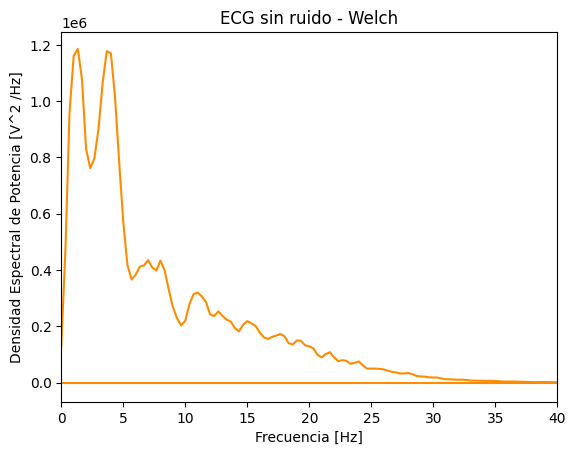

In [2]:
fs_ecg = 1000 # Hz
ecg_one_lead = np.load('ecg_sin_ruido.npy')
N = len(ecg_one_lead)

# Señal ECG sin ruido
plt.figure()
plt.plot(ecg_one_lead, color='darkorange')
plt.title('ECG sin ruido')
plt.xlabel('Tiempo [s]') 
plt.ylabel('Amplitud [mV]') 

# PSD de la señal ECG sin ruido
fw, pw= sig.welch(ecg_one_lead, fs= fs_ecg, window='flattop', nperseg=N/10) #Welch te devuelve la densidad espectral de potencia

plt.plot(fw,pw, color='darkorange') 
#plt.plot(fw, 20*np.log10(np.abs(pw)), color='darkorange')  #Para ver lo de lo 40db que caen
plt.xlim(0, 40) # Limita el eje x
plt.title('ECG sin ruido - Welch') 
plt.xlabel('Frecuencia [Hz]') 
plt.ylabel('Densidad Espectral de Potencia [V^2 /Hz]') 

# Ancho de banda de la señal ECG sin ruido
pot_acum = np.cumsum(pw) * (fw[1]-fw[0])  # Cumsum te hace la integral. Hay que multiplicarlo por un diferencial delta f para ir acumulando
pot_total = pot_acum[-1]                  # Cuando pones el [-1] te devuelve la potencia del ultimo valor y como estoy usando la potencia acumulada seria mi potencia total
 
idx = np.where(pot_acum >= 0.99 * pot_total)[0][0] # Return elements chosen from x or y depending on condition. Te arma un vector que te dice si se cumple o no la condicion Me devuelve el primer valor donde se cumple esta condicion
bw = fw[idx] # Me fijo a que frecuencia corresponde el valor
print("Ancho de banda (99% potencia):", bw, "Hz")

#### ECG con ruido

Ancho de banda del ECG con ruido (99% potencia): 32.628334573280895 Hz


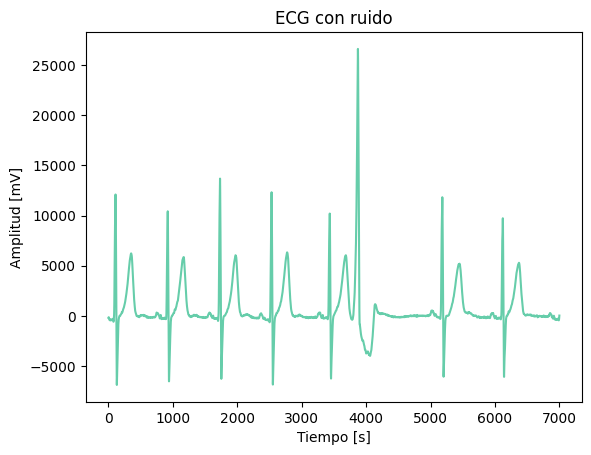

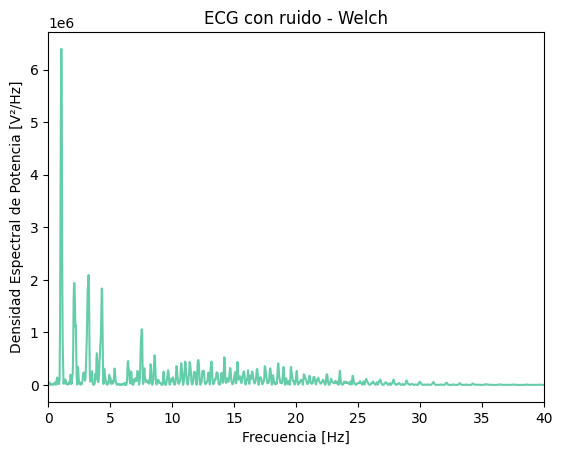

In [3]:
# para listar las variables que hay en el archivo
sio.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecgR_one_lead = mat_struct['ecg_lead']
N = len(ecgR_one_lead)

plt.figure()
plt.plot(ecg_one_lead[5000:12000], color='mediumaquamarine')
plt.title('ECG con ruido')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')

# Welch
fw_ecgR, pw_ecgR = sig.welch(ecg_one_lead, fs=fs_ecg, window='flattop', nperseg=N/40)

plt.figure()
plt.plot(fw_ecgR, pw_ecgR, color='mediumaquamarine')
plt.xlim(0, 40)
plt.title('ECG con ruido - Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia [V²/Hz]')

# Potencia acumulada
pot_acum_ecgR = np.cumsum(pw_ecgR) * (fw_ecgR[1] - fw_ecgR[0])
pot_total_ecgR = pot_acum_ecgR[-1]

# Frecuencia donde se acumula el 99% de la potencia
idx_ecgR = np.where(pot_acum_ecgR >= 0.99 * pot_total_ecgR)[0][0]
bw_ecgR = fw_ecgR[idx_ecgR]

print("Ancho de banda del ECG con ruido (99% potencia):", bw_ecgR, "Hz")

#### PPG sin ruido

Ancho de banda del PPG sin ruido (99% potencia): 5.344021376085505 Hz


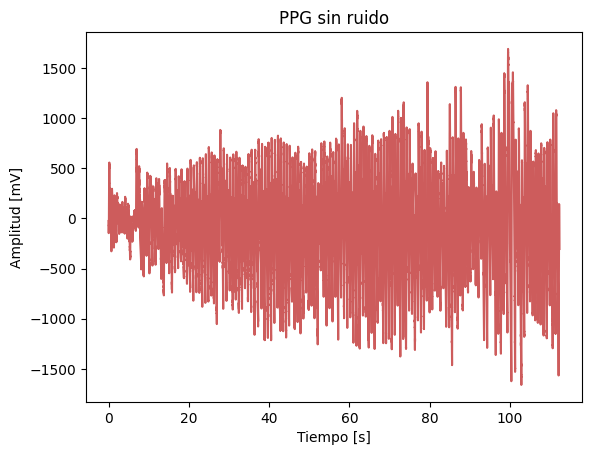

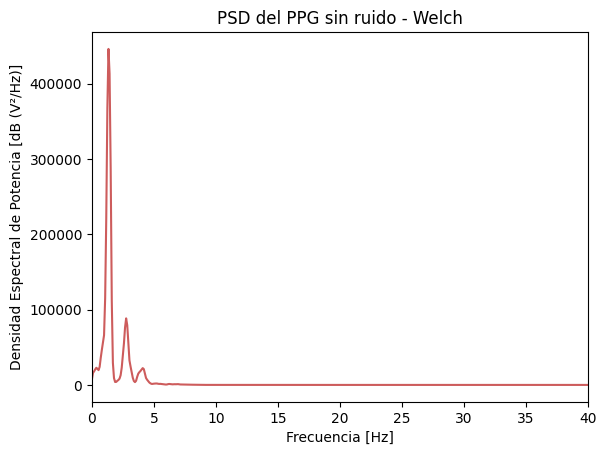

In [6]:
fs_ppg = 400 # Hz
ppg = np.load('ppg_sin_ruido.npy')
N = len(ppg)

# PPG
plt.figure()
t_ppg = np.arange(N) / fs_ppg
plt.plot(t_ppg, ppg, color='indianred')
plt.title('PPG sin ruido')
plt.xlabel('Tiempo [s]') 
plt.ylabel('Amplitud [mV]')


# PSD con Welch
fw_ppg, pw_ppg = sig.welch(ppg, fs=fs_ppg, window='flattop', nperseg=N/10)

plt.figure()
plt.plot(fw_ppg, pw_ppg, color='indianred')
plt.xlim(0, 40)
plt.title('PSD del PPG sin ruido - Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia [dB (V²/Hz)]')


pot_acum_ppg = np.cumsum(pw_ppg) * (fw_ppg[1] - fw_ppg[0])
pot_total_ppg = pot_acum_ppg[-1]

idx_ppg = np.where(pot_acum_ppg >= 0.99 * pot_total_ppg)[0][0]
bw_ppg = fw_ppg[idx_ppg]

print("Ancho de banda del PPG sin ruido (99% potencia):", bw_ppg, "Hz")

#### PPG con ruido

Ancho de banda del PPG con ruido (99% potencia): 4.149194438313837 Hz


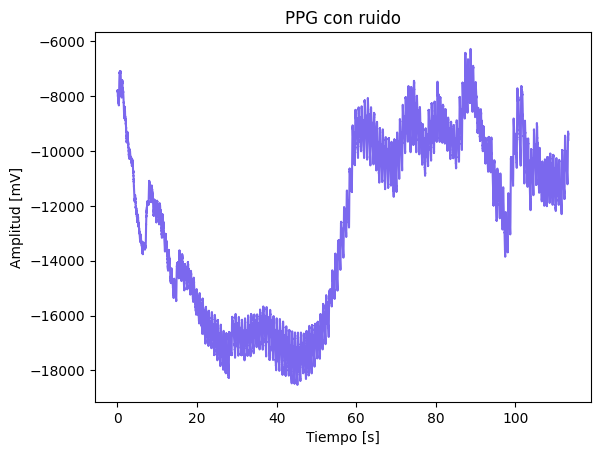

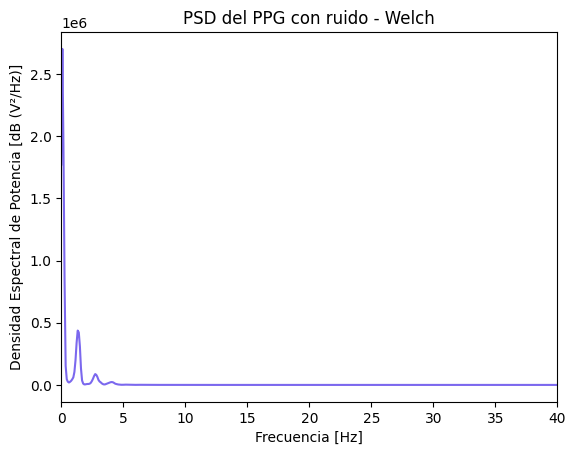

In [7]:
# # # Cargar el archivo CSV como un array de NumPy
ppgR = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe
N = len(ppgR)

# PPG con ruido
plt.figure()
t_ppgR = np.arange(N) / fs_ppg
plt.plot(t_ppgR, ppgR, color='mediumslateblue')
plt.title('PPG con ruido')
plt.xlabel('Tiempo [s]') 
plt.ylabel('Amplitud [mV]')


# PSD con Welch
fw_ppgR, pw_ppgR = sig.welch(ppgR, fs=fs_ppg, window='flattop', nperseg=N/10)

plt.figure()
plt.plot(fw_ppgR, pw_ppgR, color='mediumslateblue')
plt.xlim(0, 40)
plt.title('PSD del PPG con ruido - Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia [dB (V²/Hz)]')


pot_acum_ppgR = np.cumsum(pw_ppgR) * (fw_ppgR[1] - fw_ppgR[0])
pot_total_ppgR = pot_acum_ppgR[-1]

idx_ppgR = np.where(pot_acum_ppgR >= 0.99 * pot_total_ppgR)[0][0]
bw_ppgR = fw_ppgR[idx_ppgR]

print("Ancho de banda del PPG con ruido (99% potencia):", bw_ppgR   , "Hz")


#### Señal de audio: La cucaracha

Ancho de banda del audio (99% potencia): 1974.6666666666665 Hz


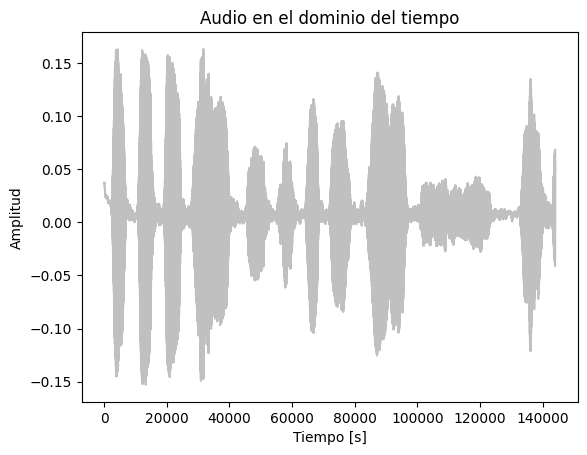

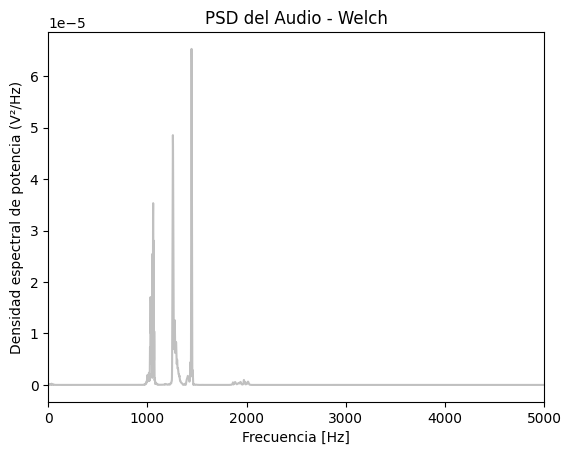

In [9]:
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
N = len(wav_data)
t_audio = np.arange(N) / fs_audio

# Señal de audio
plt.figure()
plt.plot(wav_data, color = 'silver')
plt.title('Audio en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# PSD de la señal de audio
fw_audio, pw_audio = sig.welch(wav_data, fs=fs_audio, window='flattop', nperseg=N/4)

plt.figure()
plt.plot(fw_audio,pw_audio, color='silver')
plt.title('PSD del Audio - Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.xlim(0, 5000)

pot_acum_audio = np.cumsum(pw_audio) * (fw_audio[1] - fw_audio[0])
pot_total_audio = pot_acum_audio[-1]
idx_audio = np.where(pot_acum_audio >= 0.99 * pot_total_audio)[0][0]
bw_audio = fw_audio[idx_audio]

print("Ancho de banda del audio (99% potencia):", bw_audio, "Hz")

A fines comparativos, también se realizó la PSD de la señal de audio utilizando el método de Blackman-Tukey.

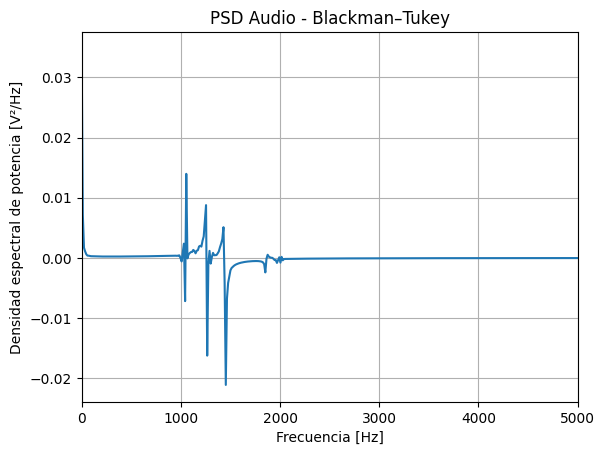

In [11]:
M = N // 10  
rxx = np.correlate(wav_data, wav_data, mode='full') / N
rxx = rxx[N-1 : N+M]   # quedarse con los retardos positivos

# # aplicar ventana
ventana_bt = np.blackman(len(rxx))
rxx_win = rxx * ventana_bt

# # transformada de Fourier de la autocorrelación
Pxx_bt = np.real(np.fft.fft(rxx_win, n=4096))
f_bt = np.fft.fftfreq(4096, 1/fs_audio)
Pxx_bt = Pxx_bt[:len(f_bt)//2]
f_bt = f_bt[:len(f_bt)//2]

# # --- Gráfico ---
plt.figure()
plt.plot(f_bt, Pxx_bt)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V²/Hz]')
plt.title('PSD Audio - Blackman–Tukey')
plt.xlim(0, 5000)
plt.grid(True)
plt.show()


### Ancho de banda

| Señal | Ancho de banda [Hz] |
| --- | --- |
| ECG sin ruido | 30 |
| ECG con ruido | 32.63|
| PPG sin ruido | 5.34|
| PPG con ruido | 4.15 |
| Audio (la cucaracha) | 1974.67 |

### Conclusiones

El método de Welch se utiliza para estimar la densidad espectral de potencia (PSD) y presenta una reducción en la varianza con respecto al periodograma ya que divide la señal en segmentos, calcula el periodograma de cada uno y luego promedia los resultados obtenidos. 
El parámetro nperseg de la función Welch permite seleccionar la cantidad de veces que se promedia. Al modificar dicho parámetro, se puede observar lo siguiente:
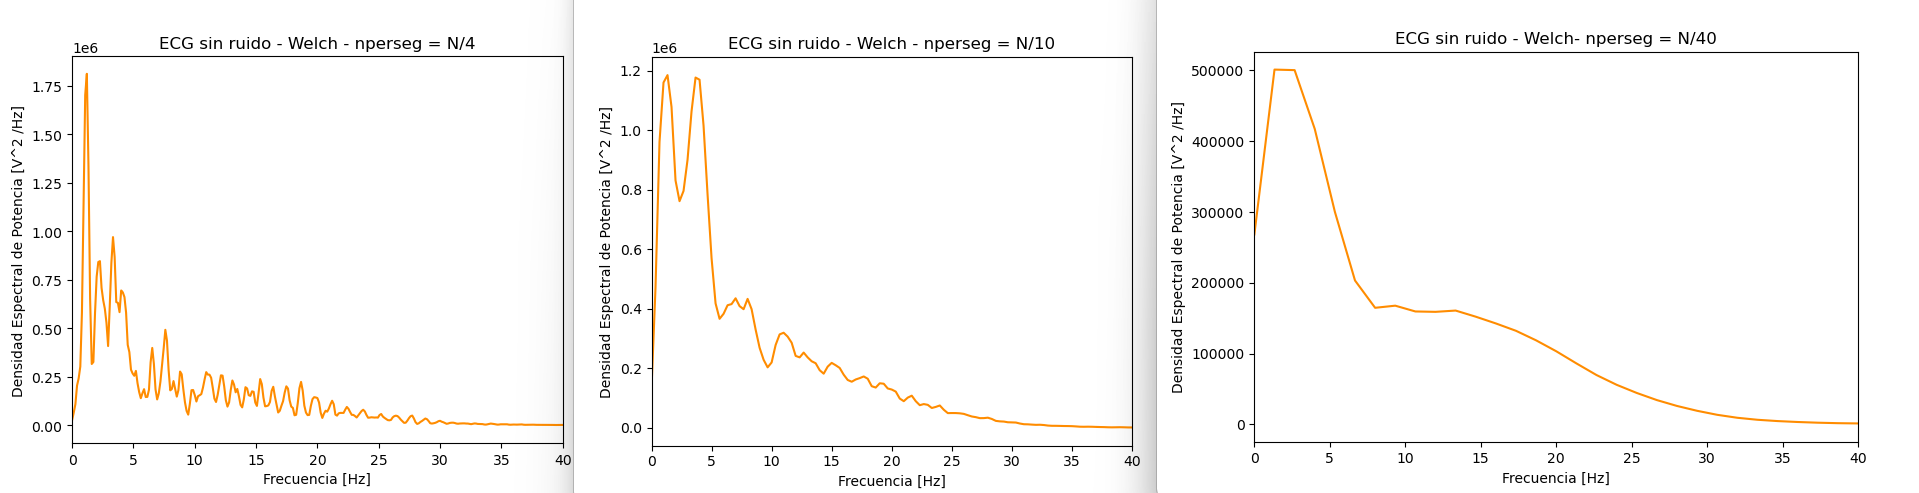
Al promediar un numero elevado de veces, en este caso 40, se pierden características de la señal, ya que esta se aplana demasiado, perdiendo detalles. Por el contrario, si realizamos este promedio menos de las veces necesarias, en este caso N/4, la señal presenta demasiados picos y valles. Es por ello que resulta fundamental buscar un compromiso entre resolución esprectral y varianza del estimador. 
Para el caso del ECG y del PPG, se determinó que un nperseg=N/10 presenta un resultado equilibrado que permite ver las componentes del espectro sin tantas variaciones. 
Sin embargo, para el ECG con ruido fue necesario usar nperseg=N/40 para evitar un warning en la función Welch que se debe a que el número de puntos por segmento es mayor que la longitud de la señal. Esta modificación permitió realizar el cálculo de la PSD correspondiente sin perder información relevante. Por último, para el caso de la señal de audio se tomó un nperseg=N/4 ya que con este tipo de señales nos interesa tener una mayor resolución en frecuencia.

El método de Blackman-Tukey consiste en calcular la autocorrelación de la señal, aplicar una ventana Blackman para limitar su longitud y luego transformar al dominio de la frecuencias de dicha autocorrelación truncada. De esta forma, permite ener un control sobre la resolución y varianza según el tamaño de la ventana. Al comparar la PSD obtenida de esta forma con la obtenida por el método de Welch se puede decir que este otro método presenta mayores variaciones, siendo más sensibe al ruido. Es por ello que el método de Welch resulta más estable.

El ancho de banda se define como la porción del espectro de frecuencias donde se encuentra la mayor parte de la potencia de la señal. En la práctica, se suele considerar el rango de frecuencia hasta el punto en el que la densidad espectral de potencia cae 40db respecto de su valor máximo.
Se puede observar que al comparar una señal de electrocardiograma sin ruido con una con ruido, esta última presenta un ancho de banda mayor. Esto se debe a que el ruido distribuye su energía en todo el espectro, agregando componentes adicionales en frecuencias altas y bajas. Por otra parte, al hacer lo mismo se puede observar que se presenta la situación inversa. En esta oportunidad, la señal con ruido tiene un ancho de banda menor ya que se introduce ruido de baja frecuencia. Por último, sobre la señal de audio se puede decir que el valor obtenido resulta esperable ya que el rango de frecuencia de la voz va de los 300 Hz a 3400 Hz.